In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import pandas as pd 
import os

ABABAB Chain 1 at (2, 4):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 2 at (3, 2):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 3 at (7, 3):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 4 at (3, 5):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 5 at (4, 5):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 6 at (5, 2):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 7 at (3, 0):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 8 at (4, 8):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
ABABAB Chain 9 at (7, 2):
  Spring Energy: 4.50


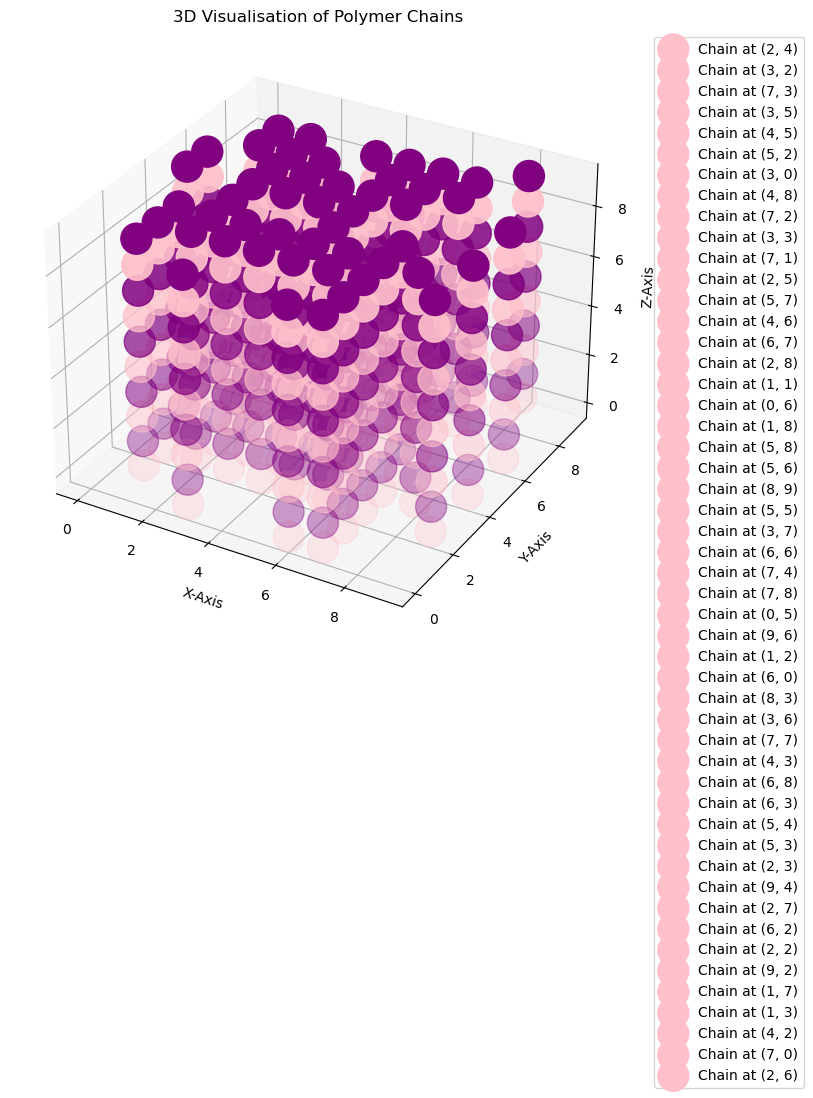

AAABBB Chain 1 at (0, 7):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 2 at (3, 7):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 3 at (5, 8):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 4 at (9, 2):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 5 at (3, 8):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 6 at (9, 1):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 7 at (4, 7):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 8 at (3, 1):
  Spring Energy: 4.50
  Interaction Energy: 0.00
  Surface Energy: 0.00
  Total Energy: 4.50
AAABBB Chain 9 at (6, 7):
  Spring Energy: 4.50


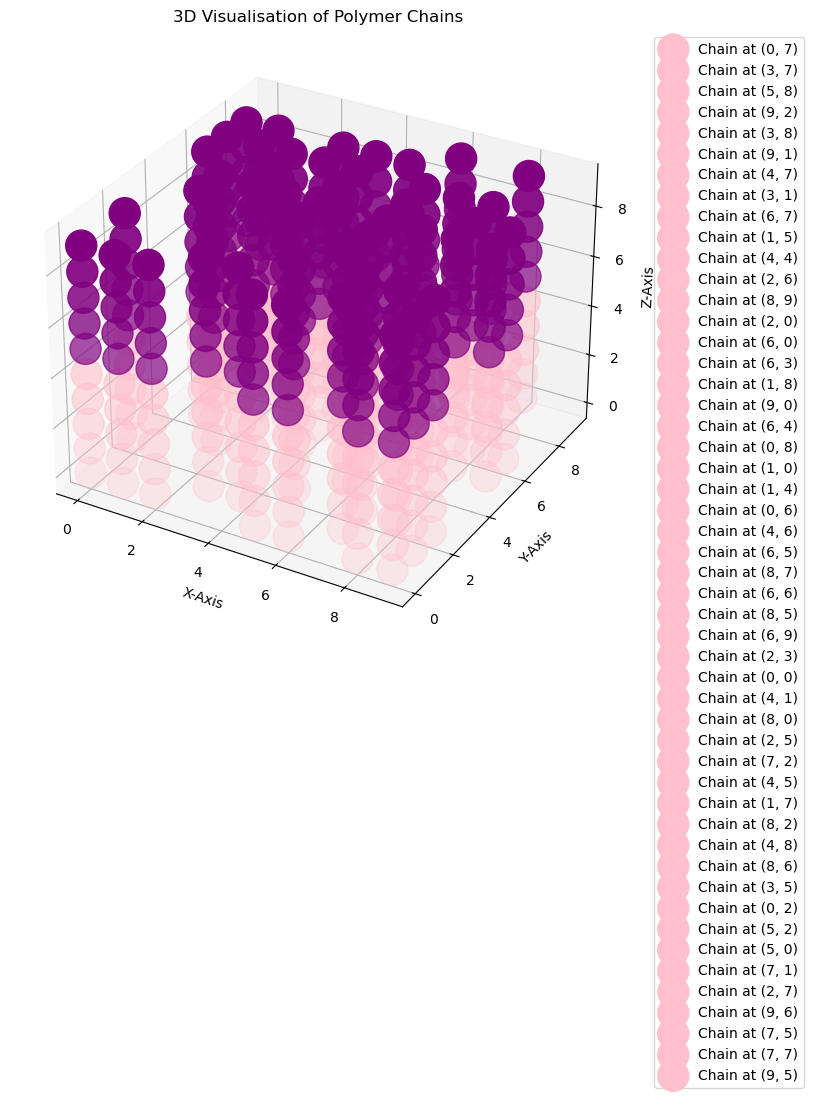

In [9]:
# Create an alternating coblock polymer ABABAB and a block copolymer AAABBB.
# Both consist of 5 A blocks and 5 B blocks following the bead-spring model, ensure code is modular.
class PolymerChain:
    def __init__(self, grafting_point, num_monomers=10, types_function=None):
        self.grafting_point = grafting_point
        self.num_monomers = num_monomers
        self.positions = self.generate_positions()
        self.types = types_function() if types_function else self.generate_types_ababab()

    def generate_positions(self):
        x, y = self.grafting_point
        z_positions = np.arange(self.num_monomers)  
        return np.array([(x, y, z) for z in z_positions])

    def generate_types_ababab(self):
        return np.array(['A' if i % 2 == 0 else 'B' for i in range(self.num_monomers)])

    def generate_types_aaabbb(self):
        half = self.num_monomers // 2
        return np.array(['A'] * half + ['B'] * half)
        

# Each subsequent monomer is 1 connected to the previous one by another spring.
def calculate_spring_energy(chain):
    
    positions = chain.positions
    k = 1 
    spring_energy = 0

    for i in range(len(positions) - 1):
        d_ij = np.linalg.norm(positions[i] - positions[i + 1])  
        spring_energy += 0.5 * k * d_ij**2

    return spring_energy
    

# Monomers of the same type repel while monomers of differing type attract.
def calculate_interaction_energy(chain):  
    positions = chain.positions
    types = chain.types
    R = 1 
    C_int = 1  
    interaction_energy = 0

    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):  
            d_ij = np.linalg.norm(positions[i] - positions[j])
            if d_ij < R:
                if types[i] == types[j]:  
                    interaction_energy += C_int * np.cos(np.pi * d_ij / (2 * R))
                else:  
                    interaction_energy -= C_int * np.cos(np.pi * d_ij / (2 * R))

    return interaction_energy


# Every monomer also interacts with the grafting surface.
def calculate_surface_energy(chain):
    positions = chain.positions
    surface_energy = 0

    for pos in positions:  
        z = pos[2]
        if z < 0: 
            surface_energy += 10**9  

    return surface_energy


# Assign a random postion for each of the polymer chains on the grid, no two can start from the same position.
def generate_grafting_points(grid_size, num_chains):
    all_points = np.array([(x, y) for x in range(grid_size) for y in range(grid_size)])
    chosen_indices = np.random.choice(len(all_points), size=num_chains, replace=False)
    return all_points[chosen_indices]

def create_polymer_chains(grid_size, num_chains, num_monomers, structure="ABABAB"):
    grafting_points = generate_grafting_points(grid_size, num_chains)
    if structure == "ABABAB":
        chains = [PolymerChain(tuple(point), num_monomers, PolymerChain(tuple(point), num_monomers).generate_types_ababab) for point in grafting_points]
    elif structure == "AAABBB":
        chains = [PolymerChain(tuple(point), num_monomers, PolymerChain(tuple(point), num_monomers).generate_types_aaabbb) for point in grafting_points]
    else:
        raise ValueError("Invalid structure type. Choose 'ABABAB' or 'AAABBB'.")
    return chains
    

# Visualise Polymer Chains on a 10x10 grafting surface grid.
def visualise_polymer_chains(chains, filename="polymer_chains.png"):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for chain in chains:
        positions = chain.positions
        types = chain.types
        xs, ys, zs = positions[:, 0], positions[:, 1], positions[:, 2]
        colors = ['pink' if t == 'A' else 'purple' for t in types]

        ax.scatter(xs, ys, zs, c=colors, marker='o', s=500, label=f"Chain at {chain.grafting_point}")

    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')
    ax.set_zlabel('Z-Axis')
    ax.set_title(f'3D Visualisation of Polymer Chains')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

grid_size = 10  
num_chains = 50 
num_monomers = 10 


# Generate chains for ABABAB structure.
chains_ababab = create_polymer_chains(grid_size, num_chains, num_monomers, structure="ABABAB")

for idx, chain in enumerate(chains_ababab):
    spring_energy = calculate_spring_energy(chain)
    interaction_energy = calculate_interaction_energy(chain)
    surface_energy = calculate_surface_energy(chain)
    total_energy = spring_energy + interaction_energy + surface_energy
    print(f"ABABAB Chain {idx + 1} at {chain.grafting_point}:")
    print(f"  Spring Energy: {spring_energy:.2f}")
    print(f"  Interaction Energy: {interaction_energy:.2f}")
    print(f"  Surface Energy: {surface_energy:.2f}")
    print(f"  Total Energy: {total_energy:.2f}")

visualise_polymer_chains(chains_ababab, filename="polymer_chains_ababab.png")


# Generate chains for AAABBB structure.
chains_aaabbb = create_polymer_chains(grid_size, num_chains, num_monomers, structure="AAABBB")

for idx, chain in enumerate(chains_aaabbb):
    spring_energy = calculate_spring_energy(chain)
    interaction_energy = calculate_interaction_energy(chain)
    surface_energy = calculate_surface_energy(chain)
    total_energy = spring_energy + interaction_energy + surface_energy
    print(f"AAABBB Chain {idx + 1} at {chain.grafting_point}:")
    print(f"  Spring Energy: {spring_energy:.2f}")
    print(f"  Interaction Energy: {interaction_energy:.2f}")
    print(f"  Surface Energy: {surface_energy:.2f}")
    print(f"  Total Energy: {total_energy:.2f}")


visualise_polymer_chains(chains_aaabbb, filename="polymer_chains_aaabbb.png")


# Calculate initial total energy of the entire system.
def calculate_total_energy(chain):
    spring_energy = calculate_spring_energy(chain)
    interaction_energy = calculate_interaction_energy(chain)
    surface_energy = calculate_surface_energy(chain)
    return spring_energy + interaction_energy + surface_energy

Running simulation for T=0.5, C_int=-0.5, Config=1...
Running simulation for T=0.5, C_int=-0.5, Config=2...
Running simulation for T=0.5, C_int=-0.5, Config=3...
Running simulation for T=0.5, C_int=-0.5, Config=4...
Running simulation for T=0.5, C_int=-0.5, Config=5...
Running simulation for T=0.5, C_int=-0.5, Config=6...
Running simulation for T=0.5, C_int=-0.5, Config=7...
Running simulation for T=0.5, C_int=-0.5, Config=8...
Running simulation for T=0.5, C_int=-0.5, Config=9...
Running simulation for T=0.5, C_int=-0.5, Config=10...
Running simulation for T=0.5, C_int=-1, Config=1...
Running simulation for T=0.5, C_int=-1, Config=2...
Running simulation for T=0.5, C_int=-1, Config=3...
Running simulation for T=0.5, C_int=-1, Config=4...
Running simulation for T=0.5, C_int=-1, Config=5...
Running simulation for T=0.5, C_int=-1, Config=6...
Running simulation for T=0.5, C_int=-1, Config=7...
Running simulation for T=0.5, C_int=-1, Config=8...
Running simulation for T=0.5, C_int=-1, Con

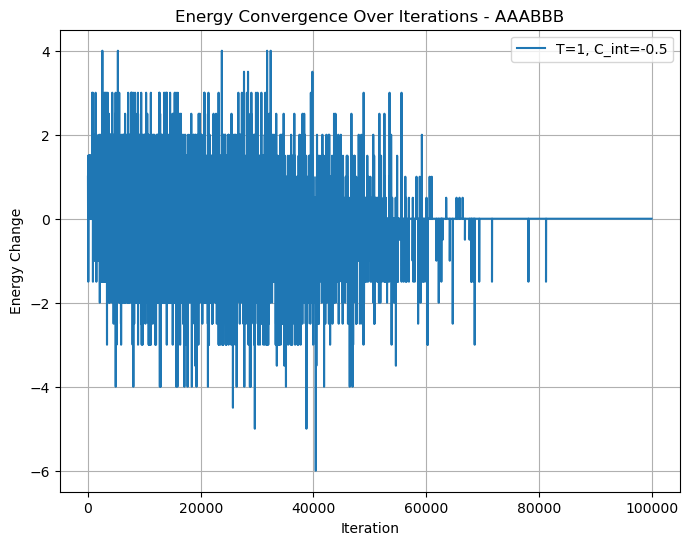

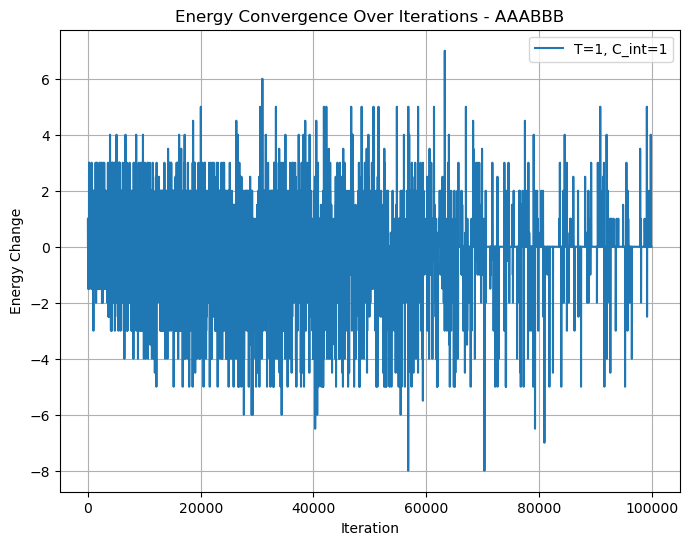

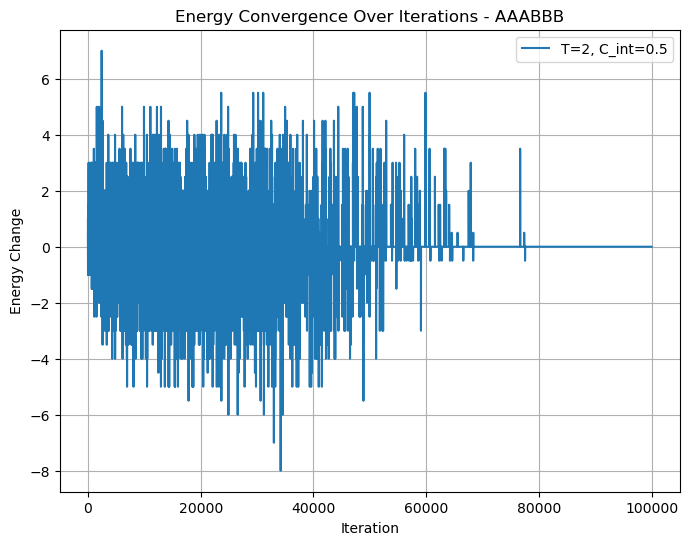

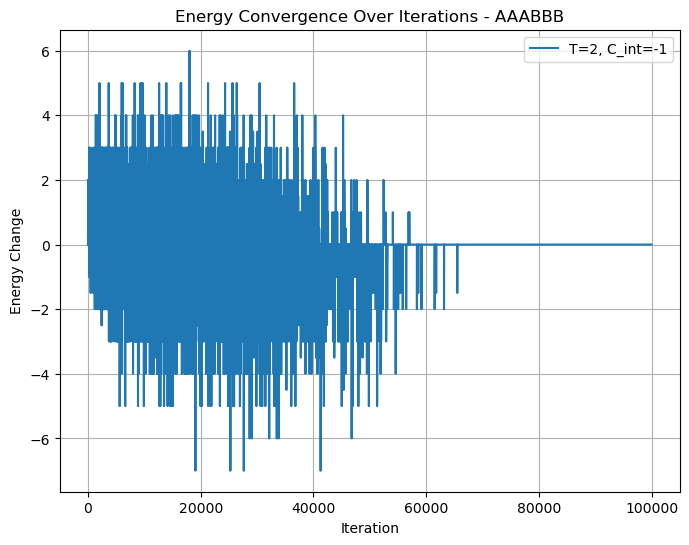

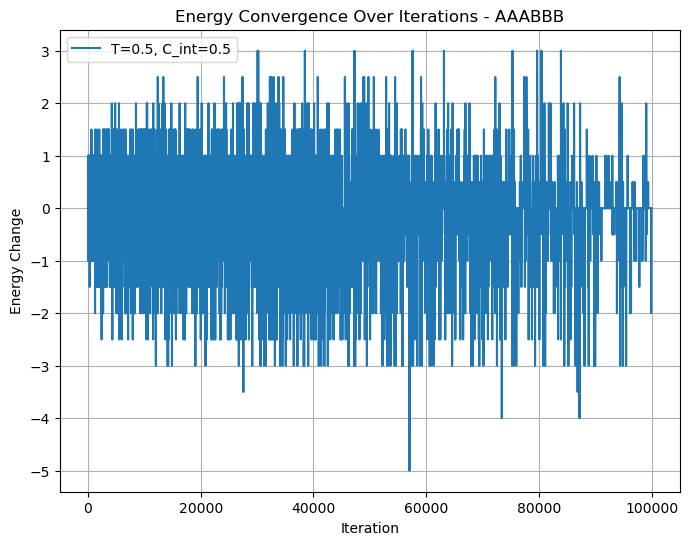

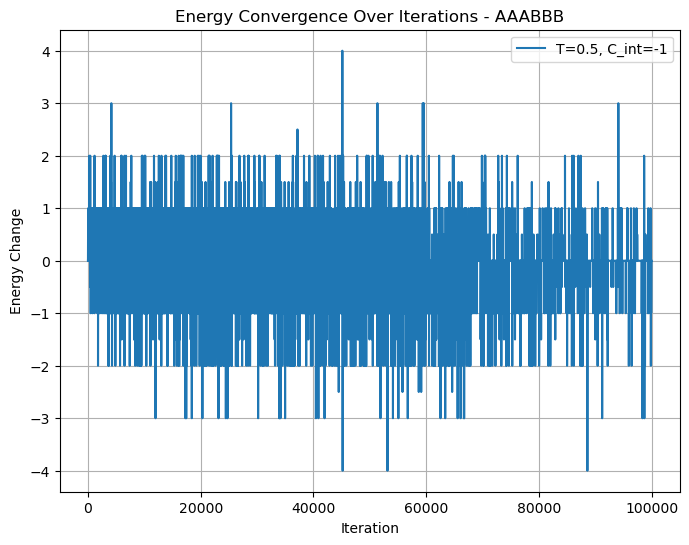

Running simulation for T=0.5, C_int=-0.5, Config=1...
Running simulation for T=0.5, C_int=-0.5, Config=2...
Running simulation for T=0.5, C_int=-0.5, Config=3...
Running simulation for T=0.5, C_int=-0.5, Config=4...
Running simulation for T=0.5, C_int=-0.5, Config=5...
Running simulation for T=0.5, C_int=-0.5, Config=6...
Running simulation for T=0.5, C_int=-0.5, Config=7...
Running simulation for T=0.5, C_int=-0.5, Config=8...
Running simulation for T=0.5, C_int=-0.5, Config=9...
Running simulation for T=0.5, C_int=-0.5, Config=10...
Running simulation for T=0.5, C_int=-1, Config=1...
Running simulation for T=0.5, C_int=-1, Config=2...
Running simulation for T=0.5, C_int=-1, Config=3...
Running simulation for T=0.5, C_int=-1, Config=4...
Running simulation for T=0.5, C_int=-1, Config=5...
Running simulation for T=0.5, C_int=-1, Config=6...
Running simulation for T=0.5, C_int=-1, Config=7...
Running simulation for T=0.5, C_int=-1, Config=8...
Running simulation for T=0.5, C_int=-1, Con

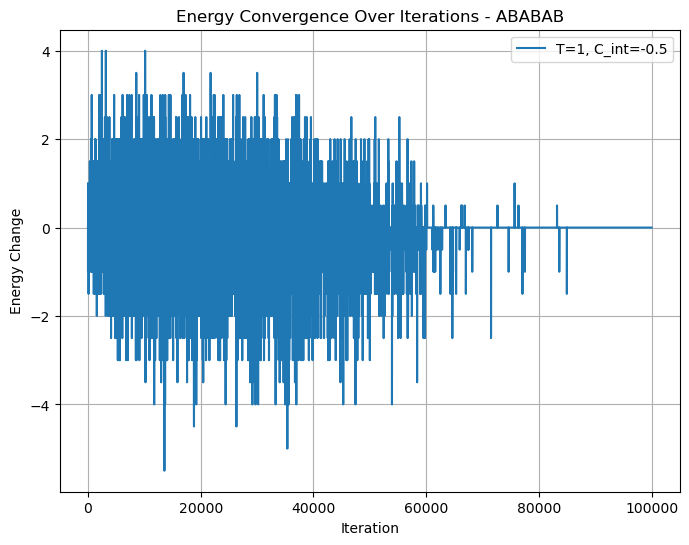

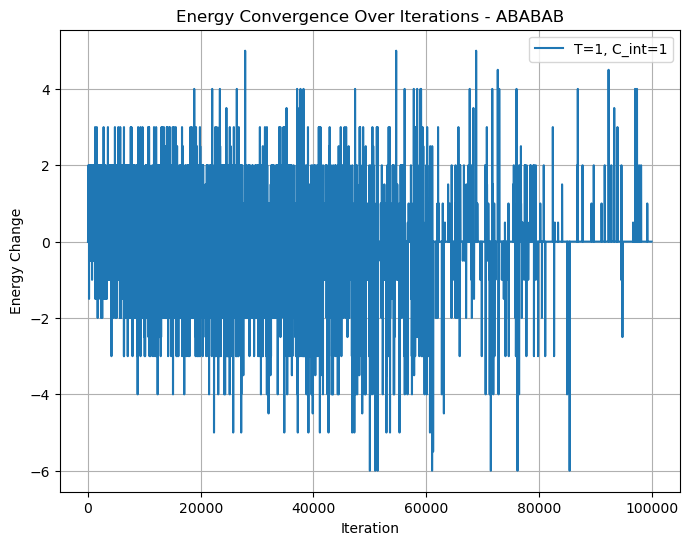

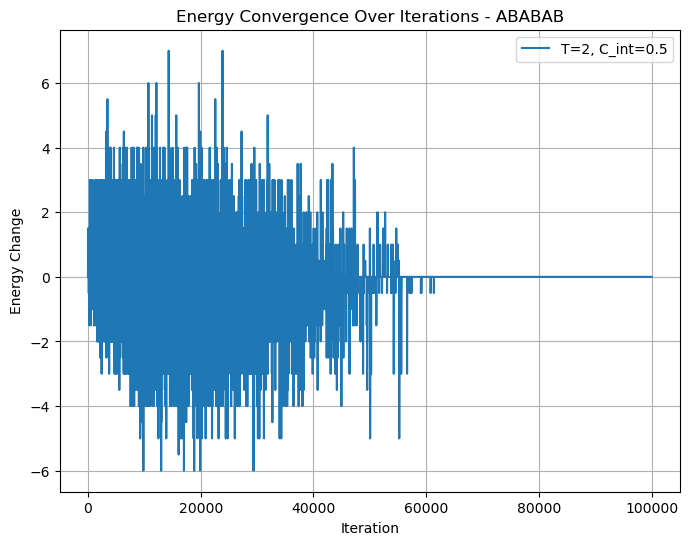

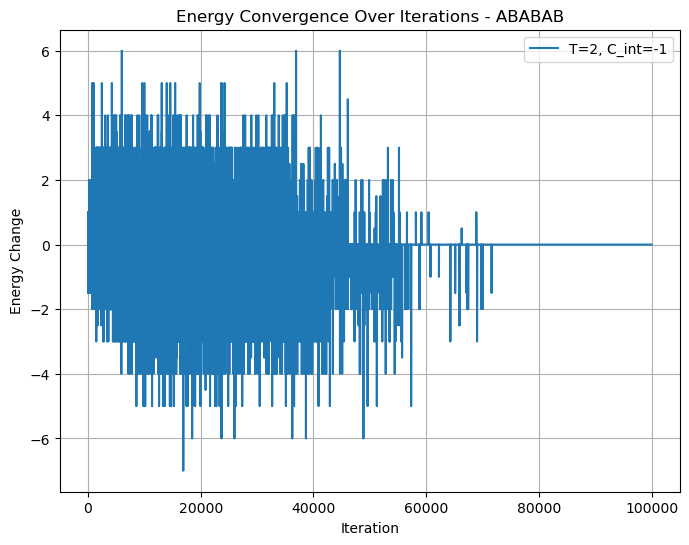

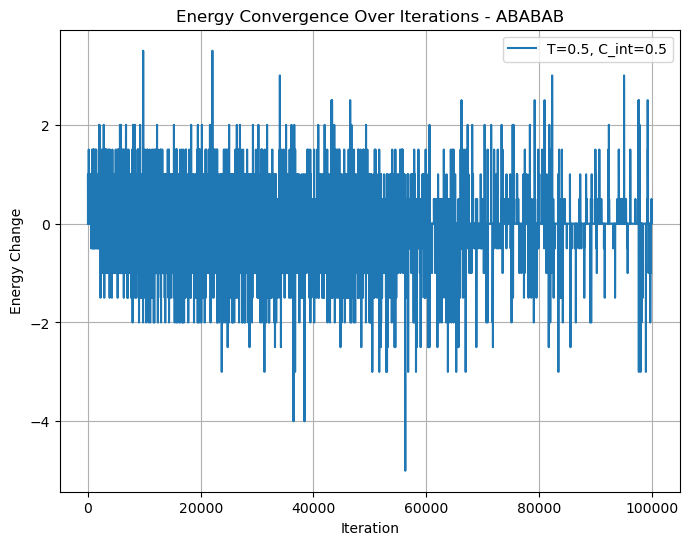

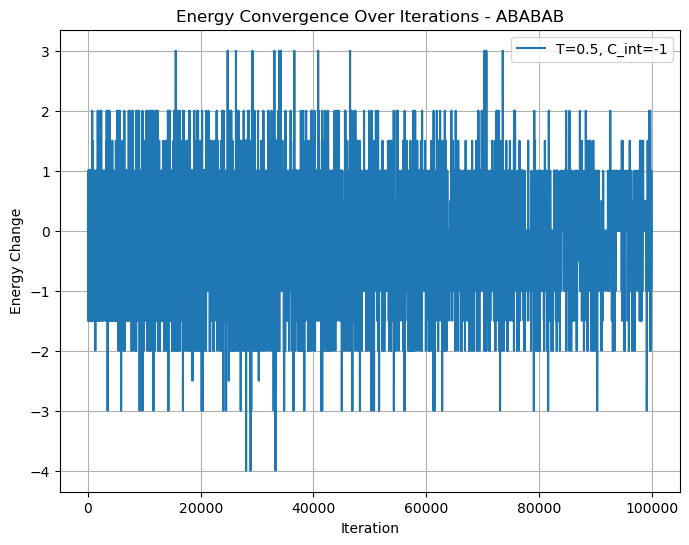

In [10]:
# Energy change caused by displacing a monomer in the initial system.
def calculate_interaction_energy_change(chain, monomer_idx, old_position, C_int=1, R=1):
    positions = chain.positions
    types = chain.types
    new_position = positions[monomer_idx]

    delta_interaction_energy = 0

    for j in range(len(positions)):
        if j == monomer_idx:
            continue

        old_distance = np.linalg.norm(old_position - positions[j])
        new_distance = np.linalg.norm(new_position - positions[j])

        if old_distance < R:
            delta_interaction_energy -= (
                C_int * np.cos(np.pi * old_distance / (2 * R))
                if types[monomer_idx] != types[j]
                else -C_int * np.cos(np.pi * old_distance / (2 * R))
            )
        if new_distance < R:
            delta_interaction_energy += (
                C_int * np.cos(np.pi * new_distance / (2 * R))
                if types[monomer_idx] != types[j]
                else -C_int * np.cos(np.pi * new_distance / (2 * R))
            )

    return delta_interaction_energy

    
# Energy change caused by surface interaction.
def calculate_surface_energy_change(old_position, new_position):
    old_z = old_position[2]
    new_z = new_position[2]

    old_energy = 10**9 if old_z < 0 else 0
    new_energy = 10**9 if new_z < 0 else 0

    return new_energy - old_energy


# Energy change caused by spring connections between monomers.
def calculate_spring_energy_change(chain, monomer_idx, old_position, k=1):
    positions = chain.positions
    delta_spring_energy = 0

    if monomer_idx > 0:
        prev_distance_old = np.linalg.norm(old_position - positions[monomer_idx - 1])
        prev_distance_new = np.linalg.norm(positions[monomer_idx] - positions[monomer_idx - 1])
        delta_spring_energy += 0.5 * k * (prev_distance_new**2 - prev_distance_old**2)

    if monomer_idx < len(positions) - 1:
        next_distance_old = np.linalg.norm(old_position - positions[monomer_idx + 1])
        next_distance_new = np.linalg.norm(positions[monomer_idx] - positions[monomer_idx + 1])
        delta_spring_energy += 0.5 * k * (next_distance_new**2 - next_distance_old**2)

    return delta_spring_energy


# Random displacement of a monomer in the system, save configurations and energy change.
def simulation(chains, temperature, C_int, iterations=100000, save_interval=1000):
    saved_configurations = []  
    total_energy_change= []  

    for step in range(iterations):
        chain_idx = np.random.randint(len(chains))
        chain = chains[chain_idx]
        monomer_idx = np.random.randint(chain.num_monomers)

        direction = np.random.choice(['x', 'y', 'z'])
        displacement = np.random.uniform(-1, 1)

        old_position = np.copy(chain.positions[monomer_idx])

        if direction == 'x':
            chain.positions[monomer_idx][0] += displacement
        elif direction == 'y':
            chain.positions[monomer_idx][1] += displacement
        else:
            chain.positions[monomer_idx][2] += displacement

        
# Calculate energy changes.
        delta_interaction_energy = calculate_interaction_energy_change(chain, monomer_idx, old_position, C_int)
        delta_surface_energy = calculate_surface_energy_change(old_position, chain.positions[monomer_idx])
        delta_spring_energy = calculate_spring_energy_change(chain, monomer_idx, old_position)
        delta_E = delta_interaction_energy + delta_surface_energy + delta_spring_energy

        
# Metropolis acceptance criterion.
        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / temperature):
            total_energy_change.append(delta_E)
        else:
            chain.positions[monomer_idx] = old_position  
            total_energy_change.append(0) 

        if step % save_interval == 0:
            saved_configurations.append(np.copy([c.positions for c in chains]))

    return saved_configurations, total_energy_change

    
# Run Simulations for different temperatures and interaction constants.
def run_simulations(grid_size, num_chains, num_monomers, temperatures, C_int_values, structure, iterations=100000, save_interval=1000):
    os.makedirs(f"simulation_results_{structure}", exist_ok=True) 
    results = {}
    for T in temperatures:
        for C_int in C_int_values:
            for config_num in range(10):  
                chains = create_polymer_chains(grid_size, num_chains, num_monomers, structure)
                print(f"Running simulation for T={T}, C_int={C_int}, Config={config_num + 1}...")
                saved_configurations, energy_change = simulation(
                    chains, temperature=T, C_int=C_int, iterations=iterations, save_interval=save_interval
                )

                np.save(f"simulation_results_{structure}/saved_configurations_T{T}_Cint{C_int}_Config{config_num + 1}.npy", saved_configurations)
                np.save(f"simulation_results_{structure}/energy_change_T{T}_Cint{C_int}_Config{config_num + 1}.npy", energy_change)

                results[(T, C_int, config_num + 1)] = {
                    "saved_configurations": saved_configurations,
                    "energy_change": energy_change,
                }
    return results


# Plot Energy vs Iterations - visualisation purposes solely, to see if steady state has been reached.
def plot_energy_change(energy_change, T, C_int, structure, filename="energy_plot.png"):
    plt.figure(figsize=(8, 6))
    plt.plot(energy_change, label=f"T={T}, C_int={C_int}")
    plt.xlabel("Iteration")
    plt.ylabel("Energy Change")
    plt.title(f"Energy Convergence Over Iterations - {structure}")
    plt.legend()
    plt.grid()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

grid_size = 10
num_chains = 50
num_monomers = 10
temperatures = [0.5, 1, 2]
C_int_values = [-0.5, -1, 0.5, 1]


# Run simulations for AAABBB structure.
results_aaabbb = run_simulations(grid_size, num_chains, num_monomers, temperatures, C_int_values, structure="AAABBB")

for T, C_int in [(1, -0.5), (1, 1), (2, 0.5), (2, -1), (0.5, 0.5), (0.5, -1)]:
    for config_num in range(1, 2):  
        energy_change = results_aaabbb[(T, C_int, config_num)]["energy_change"]
        plot_energy_change(
            energy_change,
            T,
            C_int,
            structure="AAABBB",
            filename=f"simulation_results_AAABBB/energy_plot_T{T}_Cint{C_int}_Config{config_num}.png"
        )


# Run simulations for ABABAB structure.
results_ababab = run_simulations(grid_size, num_chains, num_monomers, temperatures, C_int_values, structure="ABABAB")

for T, C_int in [(1, -0.5), (1, 1), (2, 0.5), (2, -1), (0.5, 0.5), (0.5, -1)]:
    for config_num in range(1, 2):  
        energy_change = results_ababab[(T, C_int, config_num)]["energy_change"]
        plot_energy_change(
            energy_change,
            T,
            C_int,
            structure="ABABAB",
            filename=f"simulation_results_ABABAB/energy_plot_T{T}_Cint{C_int}_Config{config_num}.png"
        )

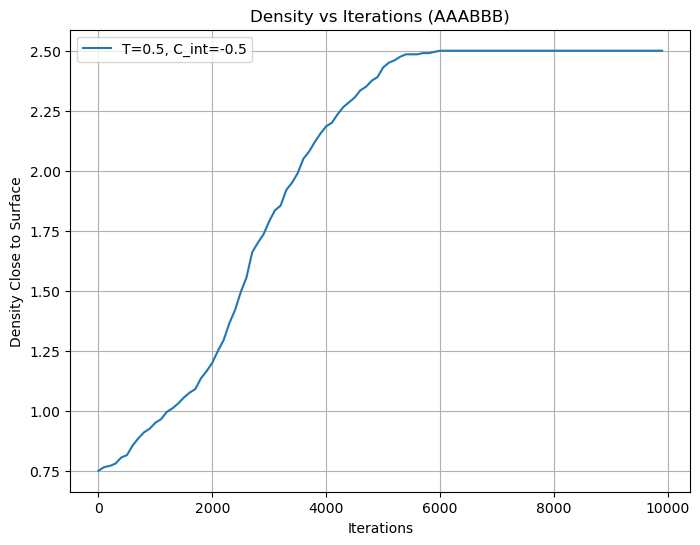

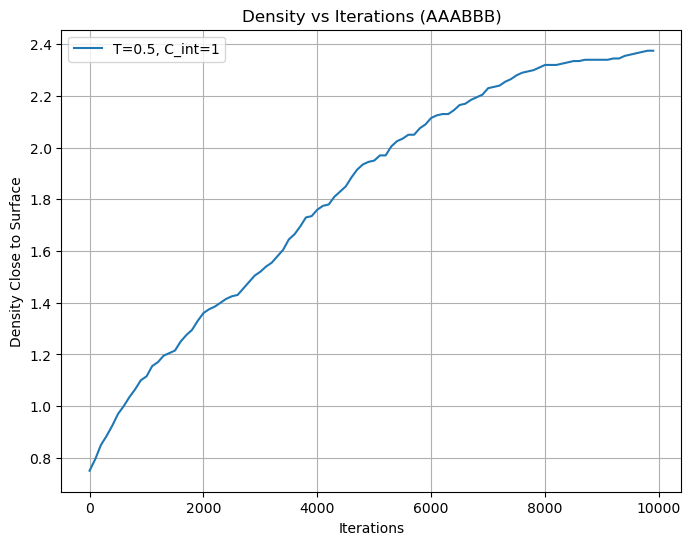

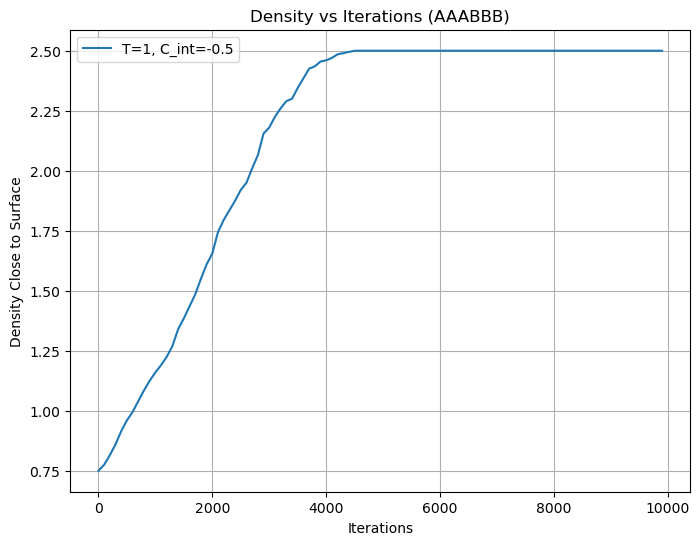

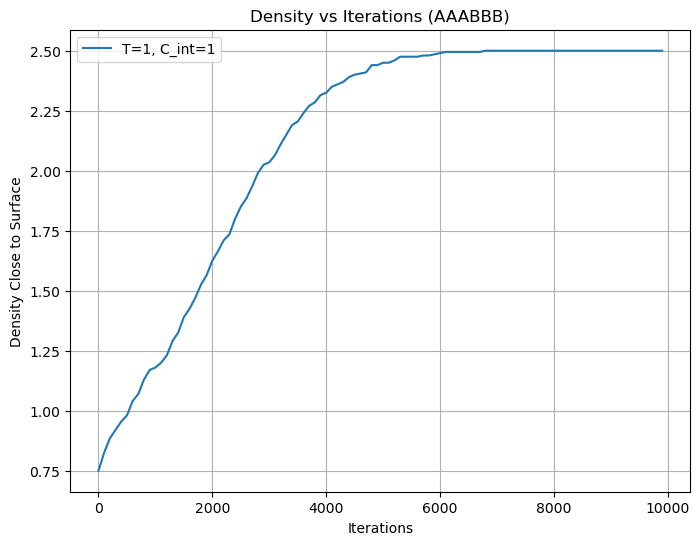

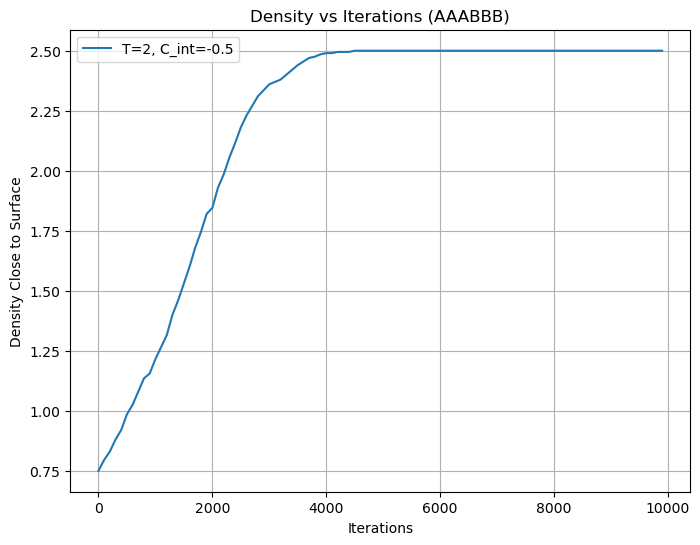

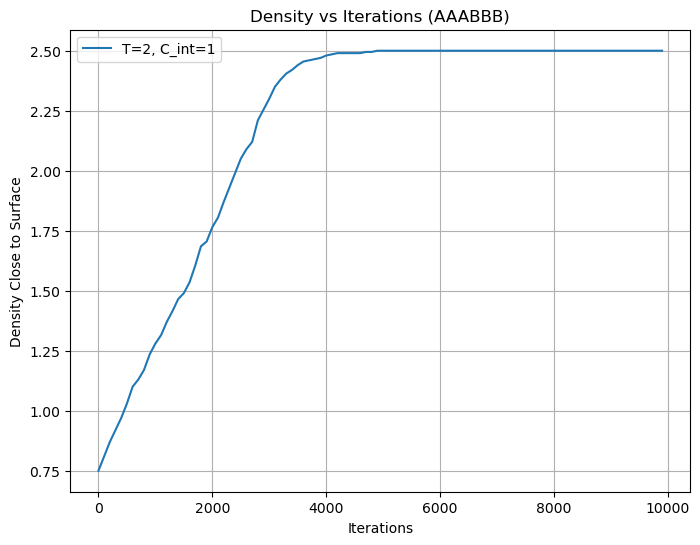

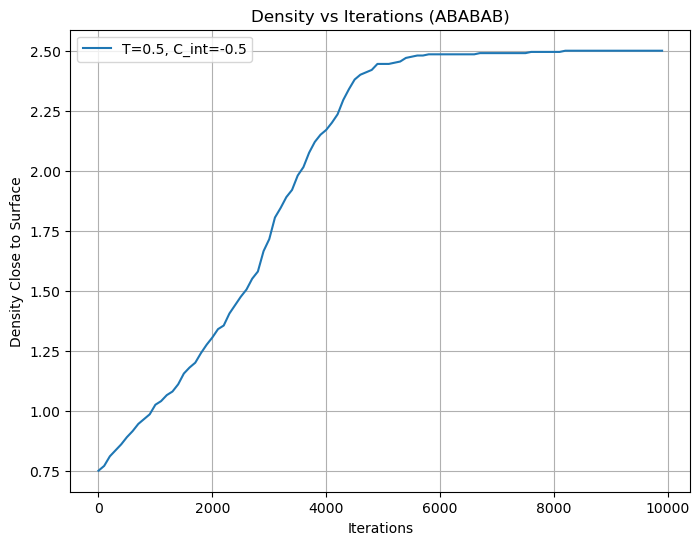

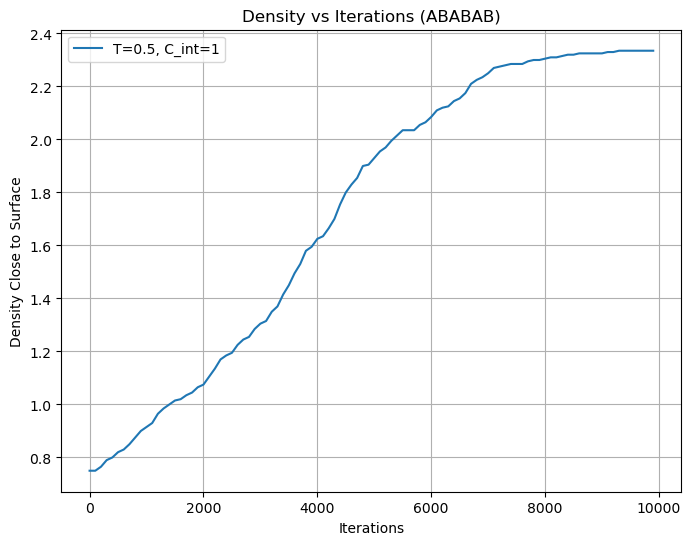

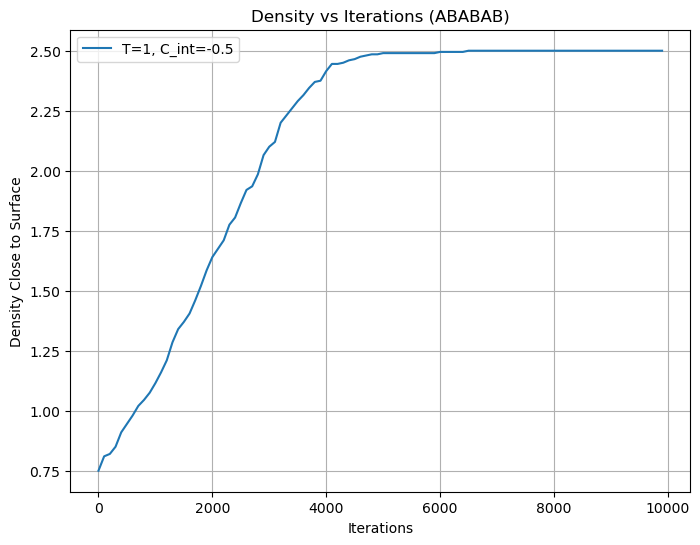

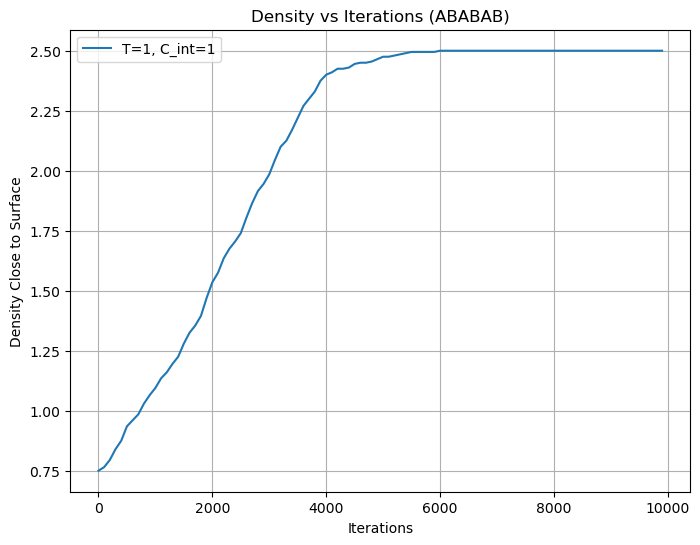

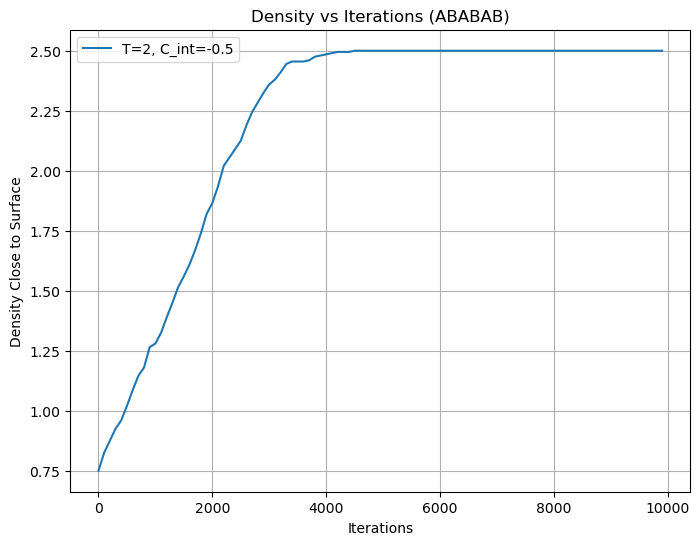

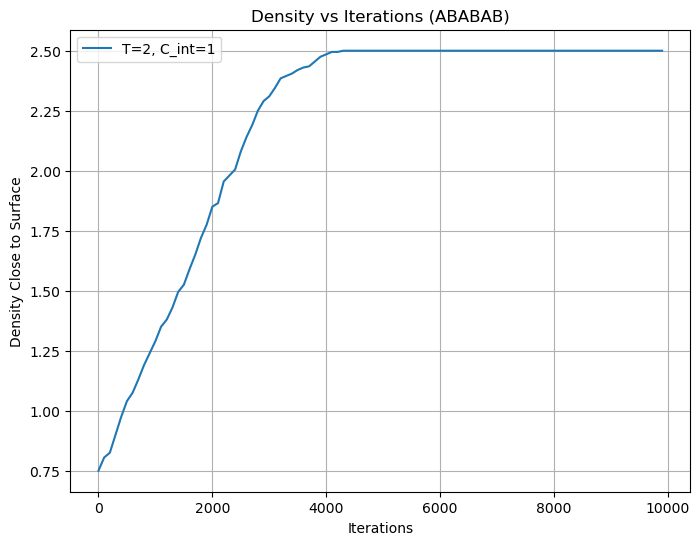

In [13]:
# Calculate density close to the surface, counting monomers with z ≤ 2.
def load_configurations(structure, T, C_int, config_num):
    file_path = f"simulation_results_{structure}/saved_configurations_T{T}_Cint{C_int}_Config{config_num}.npy"
    return np.load(file_path, allow_pickle=True)
    
def calculate_density(configurations, grid_size=10, surface_height=2):
    densities = []
    volume = grid_size * grid_size * surface_height  

    for config in configurations:
        all_monomers = np.vstack(config)  
        monomers_near_surface = np.sum(all_monomers[:, 2] <= surface_height)  
        density = monomers_near_surface / volume
        densities.append(density)

    return densities


# Plot density vs iterations.
def plot_density_vs_iterations(densities, T, C_int, structure, config_num, save_path):
    iterations = np.arange(len(densities)) * 100  
    plt.figure(figsize=(8, 6))
    plt.plot(iterations, densities, label=f"T={T}, C_int={C_int}")
    plt.xlabel("Iterations")
    plt.ylabel("Density Close to Surface")
    plt.title(f"Density vs Iterations ({structure})")
    plt.legend()
    plt.grid()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    

# Generate density vs iterations plots for all 12 combinations, 6 for each system.
def generate_density_plots():
    grid_size = 10
    surface_height = 2
    config_num = 1  
    temperatures = [0.5, 1, 2]
    C_int_values = [-0.5, 1]
    structures = ["AAABBB", "ABABAB"]

    for structure in structures:
        for T in temperatures:
            for C_int in C_int_values:

                configurations = load_configurations(structure, T, C_int, config_num)

                densities = calculate_density(configurations, grid_size, surface_height)

                plot_path = f"simulation_results_{structure}/density_plot_T{T}_Cint{C_int}_Config{config_num}.png"
                plot_density_vs_iterations(densities, T, C_int, structure, config_num, save_path=plot_path)

generate_density_plots()

In [13]:
# Function to calculate equilibrium density after steady state, only consider iterations after 50,000 (halfway point).
def calculate_equilibrium_density(densities, last_steps=50000):
    steady_state_densities = densities[-last_steps:]
    average_density = np.mean(steady_state_densities)
    variance_density = np.var(steady_state_densities)
    return average_density, variance_density

def load_configurations(structure, T, C_int, config_num):
    file_path = f"simulation_results_{structure}/saved_configurations_T{T}_Cint{C_int}_Config{config_num}.npy"
    return np.load(file_path, allow_pickle=True)


# Calculate the density close to the surface (z ≤ 2)
def calculate_density(configurations, grid_size=10, surface_height=2):
    densities = []
    volume = grid_size * grid_size * surface_height

    for config in configurations:
        all_monomers = np.vstack(config)
        monomers_near_surface = np.sum(all_monomers[:, 2] <= surface_height)
        density = monomers_near_surface / volume
        densities.append(density)

    return densities

# Generate a table with equilibrium densities and variances for all combinations.
def generate_equilibrium_density_table():
    grid_size = 10
    surface_height = 2
    temperatures = [0.5, 1, 2]
    C_int_values = [-0.5, 1]
    structures = ['AAABBB', 'ABABAB']
    config_num = 1

    results = []

    for structure in structures:
        for T in temperatures:
            for C_int in C_int_values:
                try:
                    configurations = load_configurations(structure, T, C_int, config_num)
                    densities = calculate_density(configurations, grid_size, surface_height)
                    mean_density, variance_density = calculate_equilibrium_density(densities)

                    results.append({
                        "Structure": structure,
                        "Temperature (T)": T,
                        "Interaction Constant (C_int)": C_int,
                        "Equilibrium Density": mean_density,
                        "Variance of Density": variance_density
                    })
                except FileNotFoundError:
                    print(f"Data not found for {structure}, T={T}, C_int={C_int}, Config={config_num}")
                    continue

    df = pd.DataFrame(results)
    df.to_csv("equilibrium_density_results.csv", index=False)
    return df

   Structure  Temperature (T)  Interaction Constant (C_int)  \
0     AAABBB              0.5                          -0.5   
1     AAABBB              0.5                           1.0   
2     AAABBB              1.0                          -0.5   
3     AAABBB              1.0                           1.0   
4     AAABBB              2.0                          -0.5   
5     AAABBB              2.0                           1.0   
6     ABABAB              0.5                          -0.5   
7     ABABAB              0.5                           1.0   
8     ABABAB              1.0                          -0.5   
9     ABABAB              1.0                           1.0   
10    ABABAB              2.0                          -0.5   
11    ABABAB              2.0                           1.0   

    Equilibrium Density  Variance of Density  
0               2.00820             0.394131  
1               1.81925             0.227138  
2               2.15175             0.2

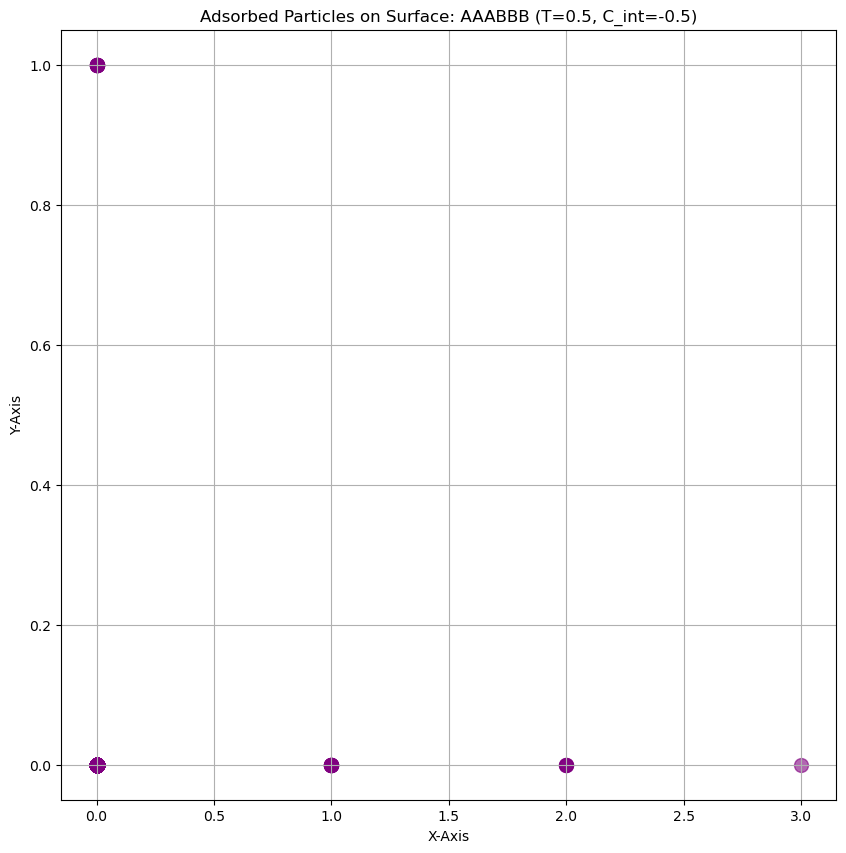

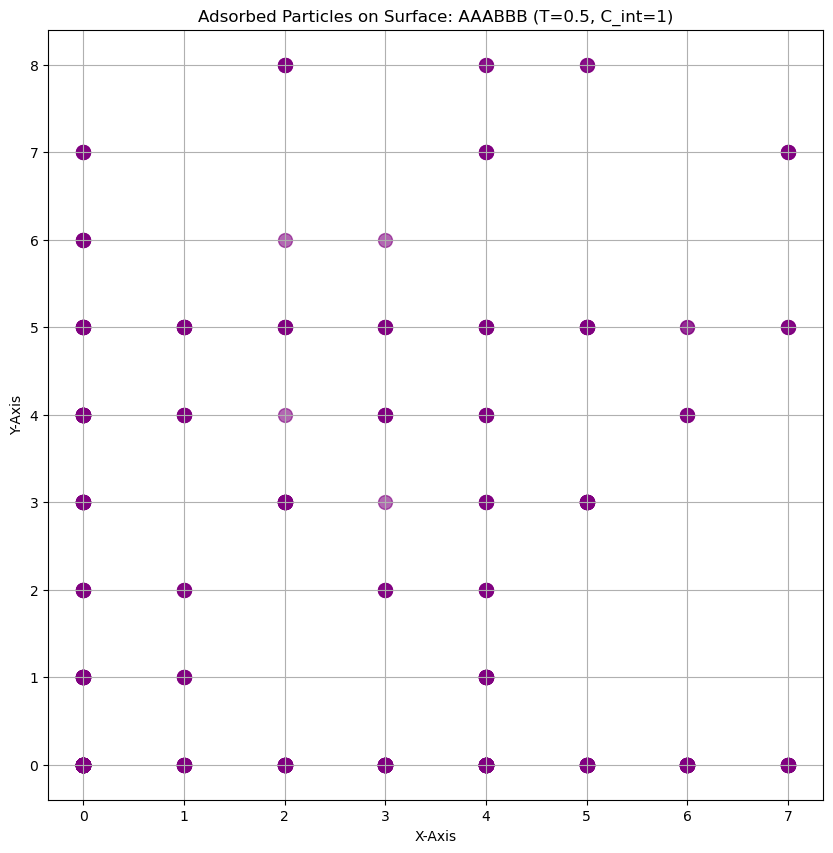

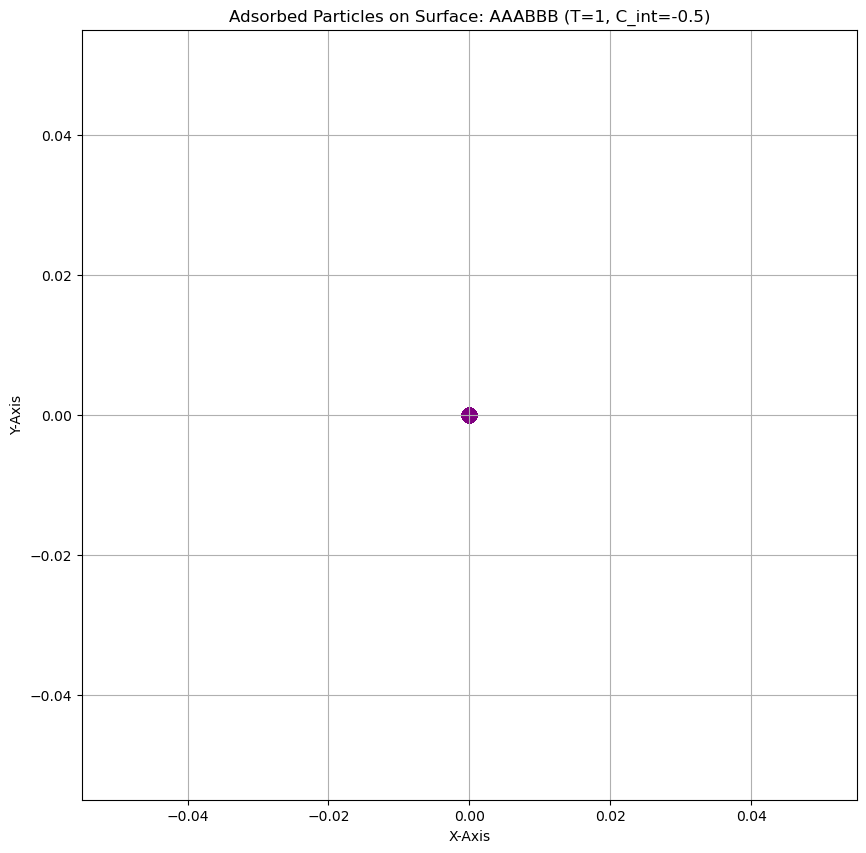

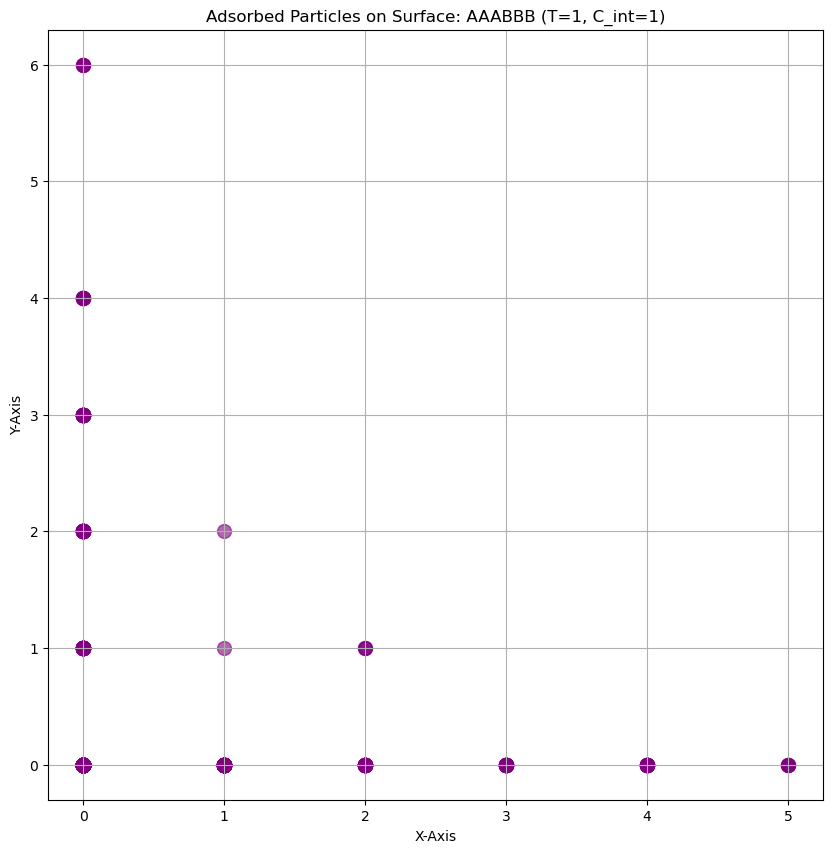

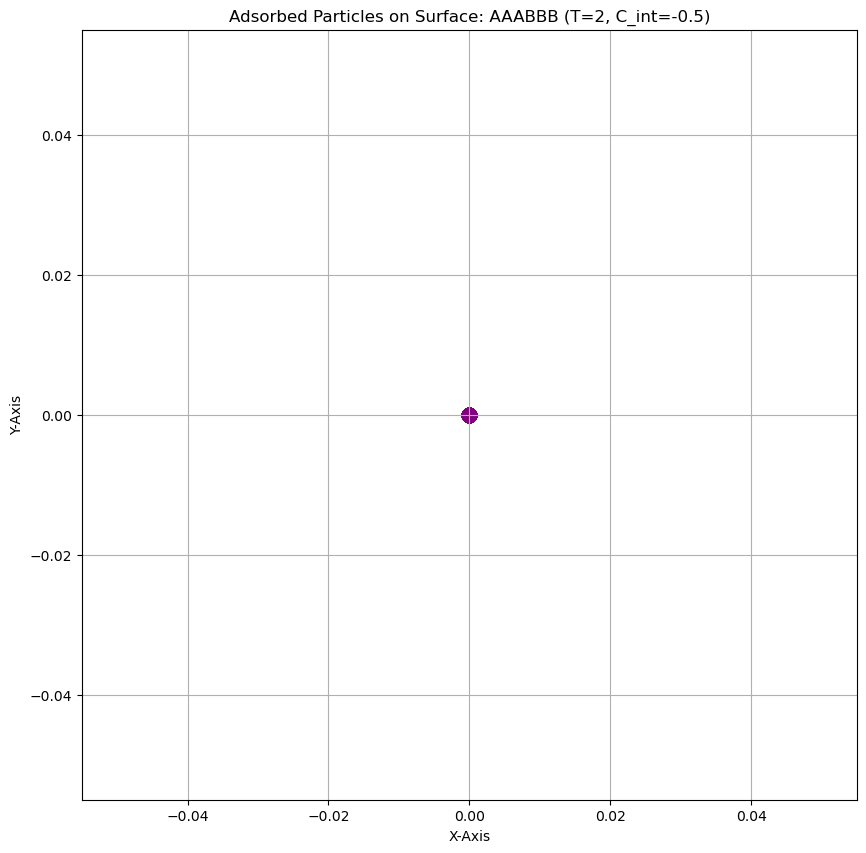

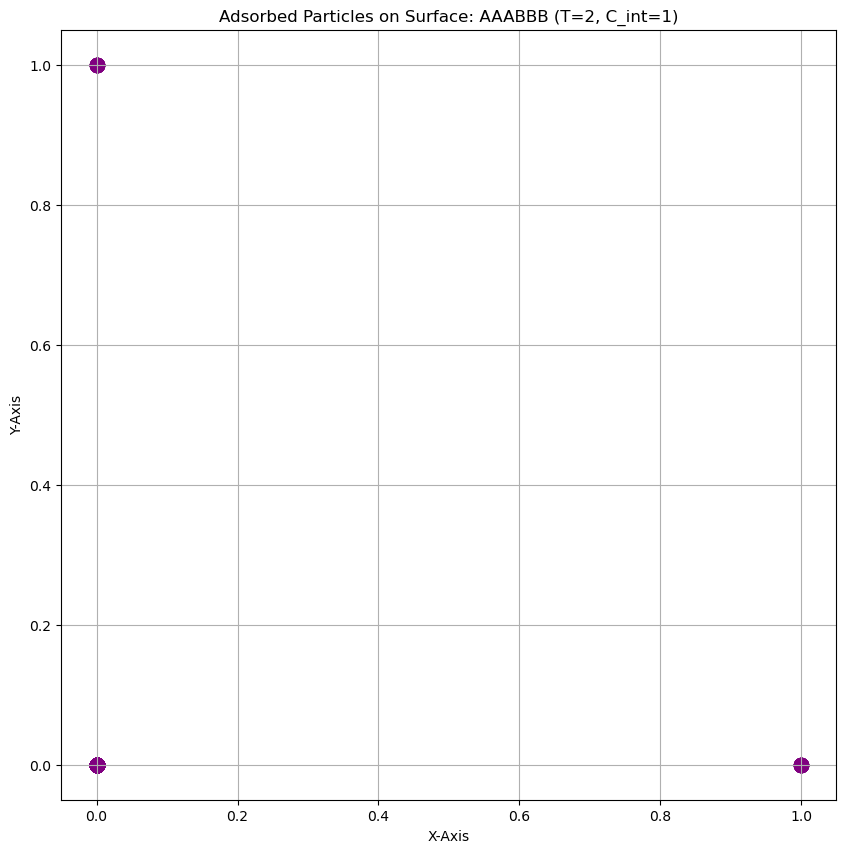

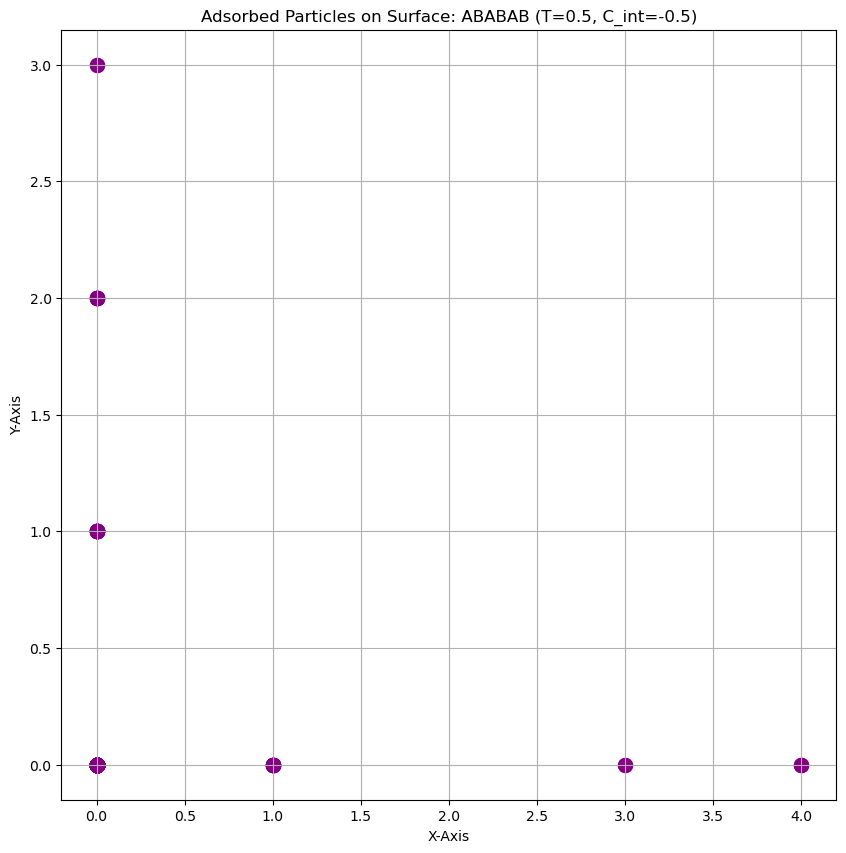

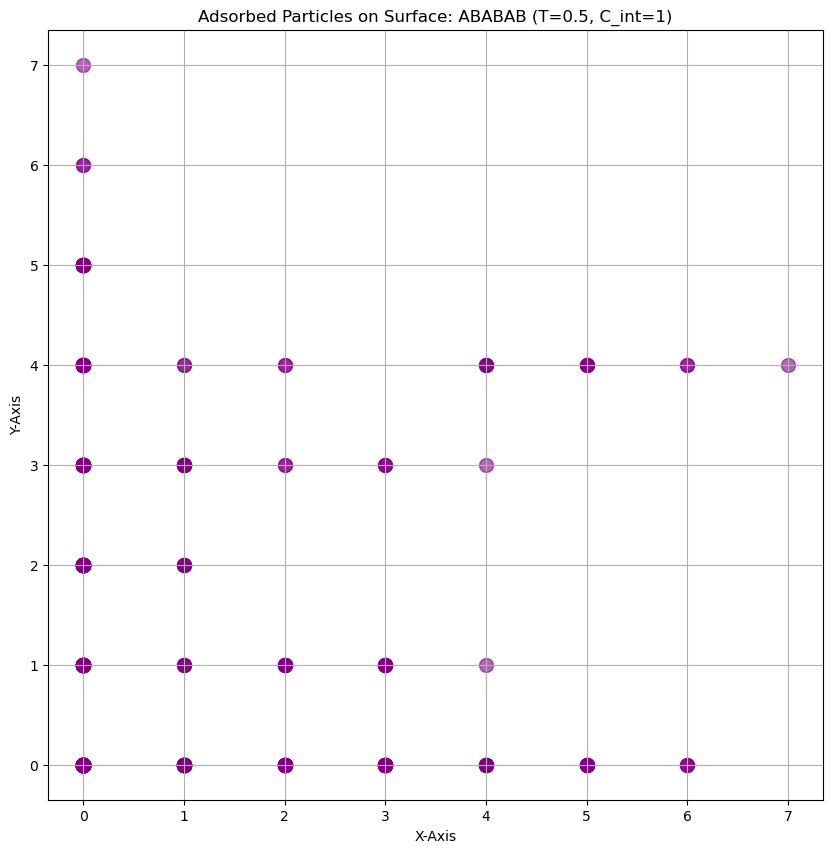

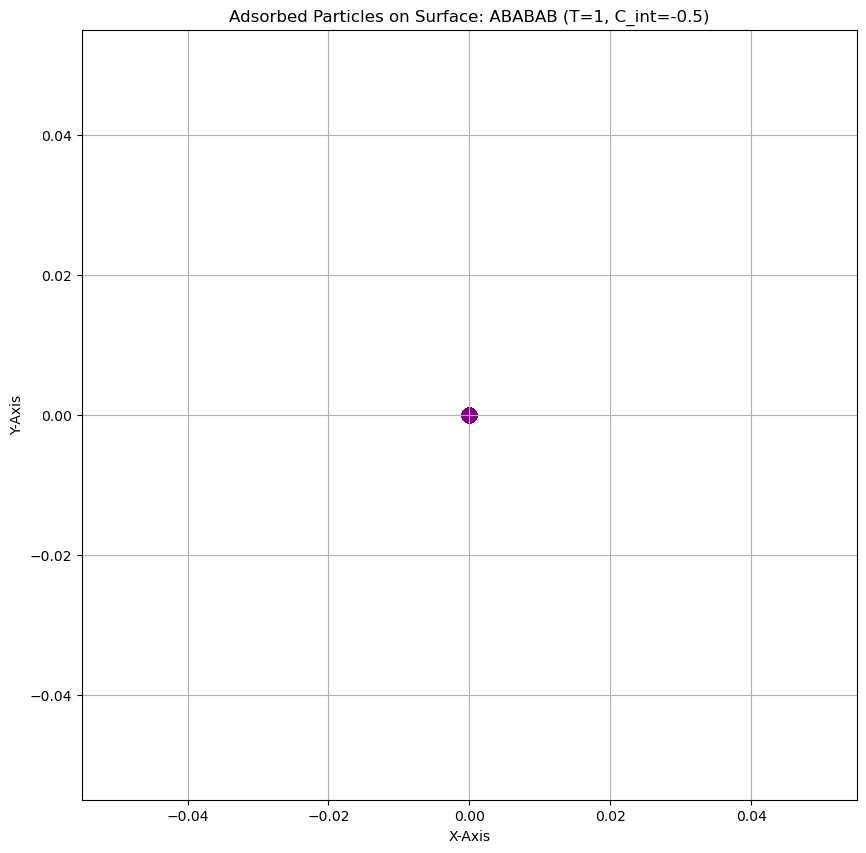

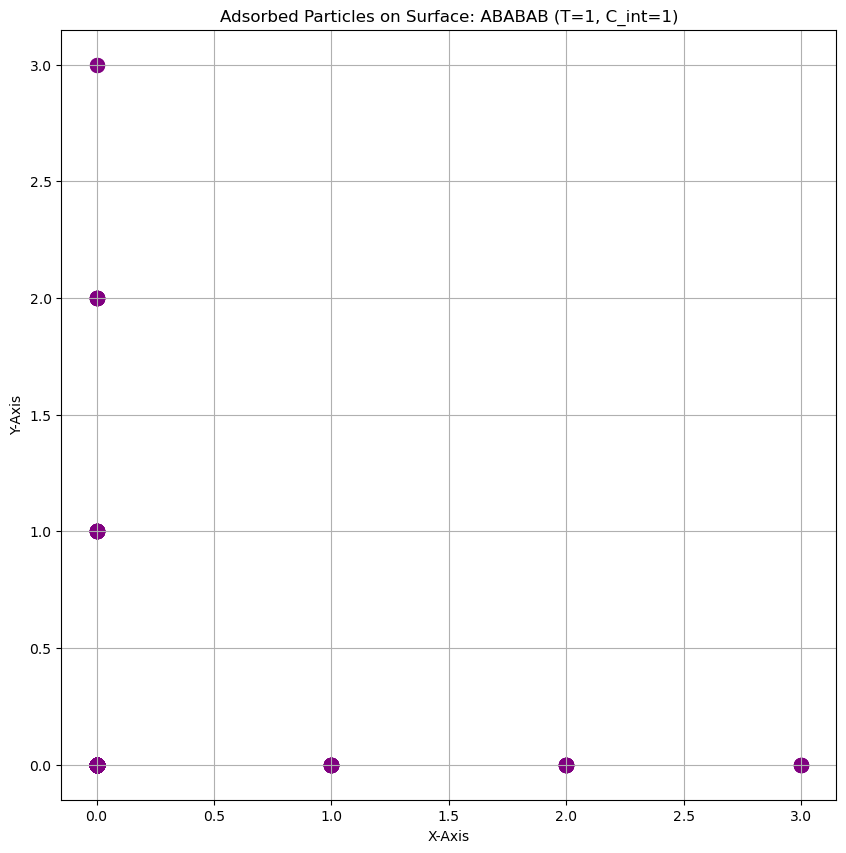

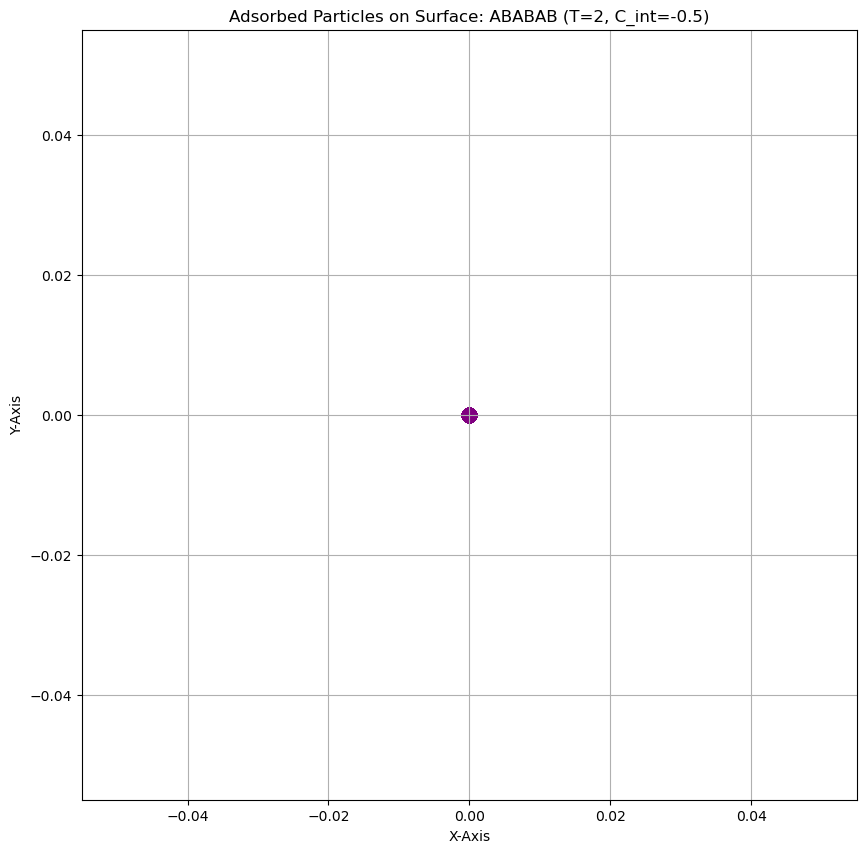

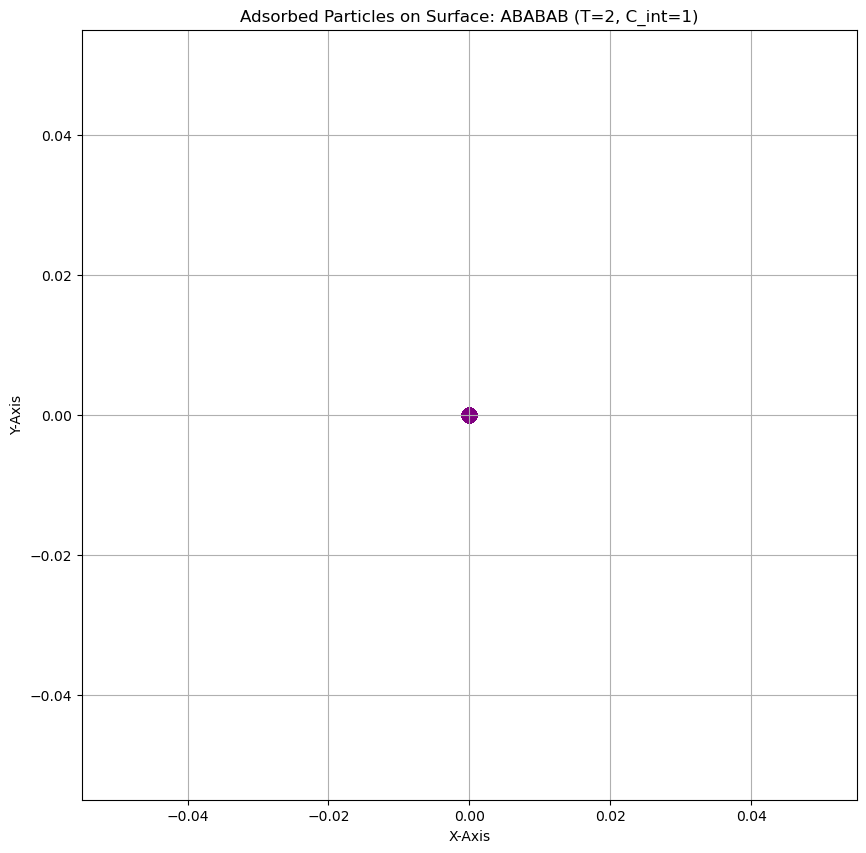

In [15]:
# Visualise adsorbed particles by only plotting monomers with z ≤ 2.
def visualise_adsorbed_particles(structure, T, C_int, config_num=1, surface_height=2):
    configurations = load_configurations(structure, T, C_int, config_num)
    final_config = configurations[-1]

    output_dir = f"simulation_results_{structure}"
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, f"adsorbed_particles_T{T}_Cint{C_int}_Config{config_num}.png")

    plt.figure(figsize=(10, 10))
    plt.title(f"Adsorbed Particles on Surface: {structure} (T={T}, C_int={C_int})")
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")

    for chain in final_config:
        for monomer in chain:
            x, y, z = monomer
            if z <= surface_height:
                plt.scatter(x, y, s=100, c='purple', alpha=0.6)

    plt.grid(True)
    plt.savefig(plot_path)
    plt.show()

equilibrium_density_table = generate_equilibrium_density_table()
print(equilibrium_density_table)

structures = ['AAABBB', 'ABABAB']
temperatures = [0.5, 1, 2]
C_int_values = [-0.5, 1]

for structure in structures:
    for T in temperatures:
        for C_int in C_int_values:
            visualise_adsorbed_particles(structure, T, C_int)  